In [1]:
# Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
# Data Colletion

In [4]:
wine_dataset = pd.read_csv('winequality-red.csv')

In [5]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine_dataset.shape

(1599, 12)

In [9]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [52]:
# Data Analysis and Data Visulation

# This helps to find which parameters are useful to find good quality wine.

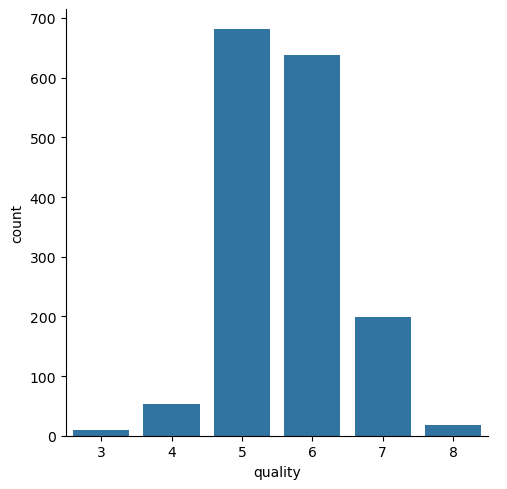

In [11]:
sns.catplot(x='quality',kind='count',data=wine_dataset)

<Axes: xlabel='quality', ylabel='fixed acidity'>

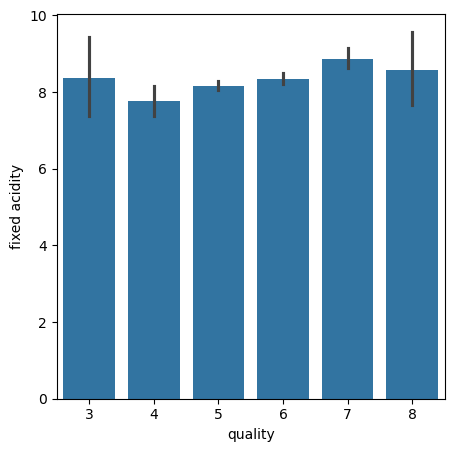

In [36]:
# Fixed acdity vs Quality : CND
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='fixed acidity',data=wine_dataset)

<Axes: xlabel='quality', ylabel='volatile acidity'>

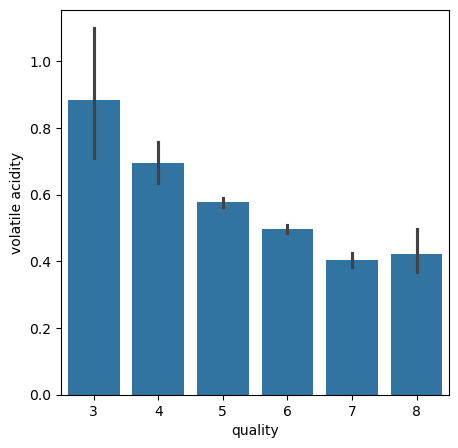

In [37]:
# Volatile acidity vs Quality : Inverse Proposnal
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity',data=wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

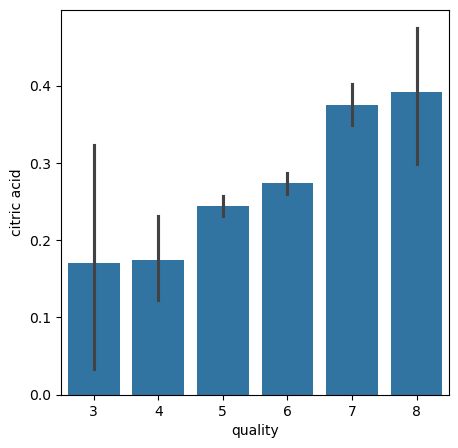

In [38]:
# Citric acid vs Quality : Proposnal
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid',data=wine_dataset)

<Axes: xlabel='quality', ylabel='residual sugar'>

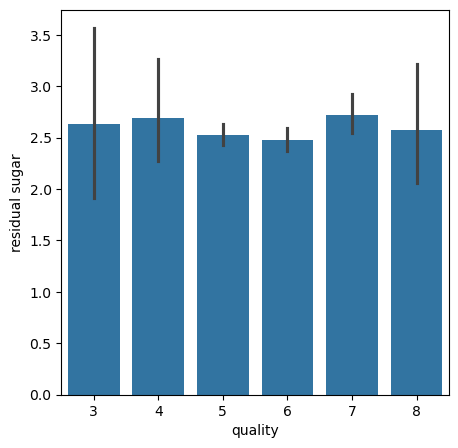

In [39]:
# Residual sugar vs Quality : CND
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='residual sugar',data=wine_dataset)

<Axes: xlabel='quality', ylabel='chlorides'>

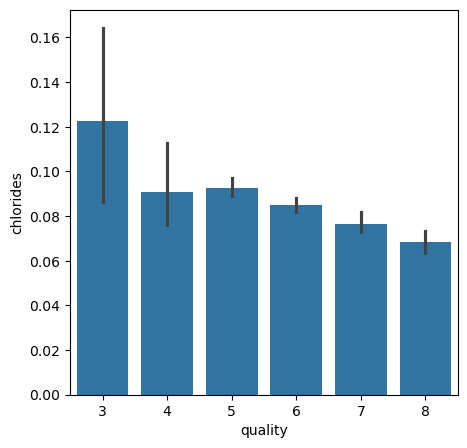

In [40]:
# Chlorides vs Quality : Inverse Proposnal
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='chlorides',data=wine_dataset)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

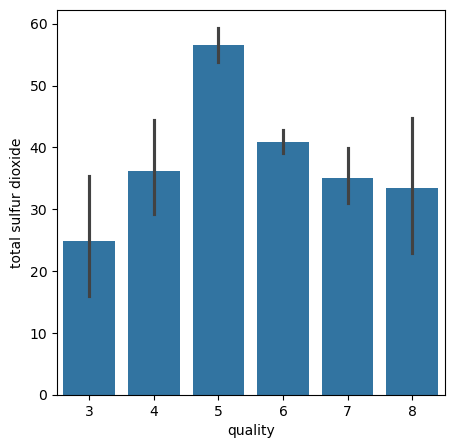

In [41]:
# Total sulfur dioxide vs Quality : CND
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='total sulfur dioxide',data=wine_dataset)

<Axes: xlabel='quality', ylabel='density'>

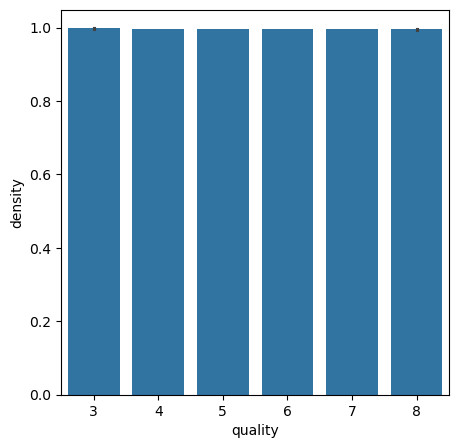

In [42]:
# Density vs Quality : Equal
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='density',data=wine_dataset)

<Axes: xlabel='quality', ylabel='pH'>

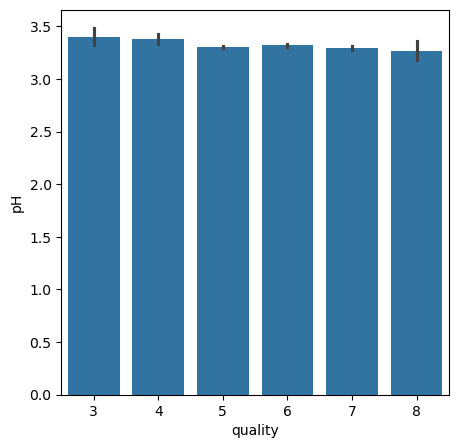

In [44]:
# pH vs Quality : Almost Equal Between 3.0 to 3.3
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='pH',data=wine_dataset)

<Axes: xlabel='quality', ylabel='sulphates'>

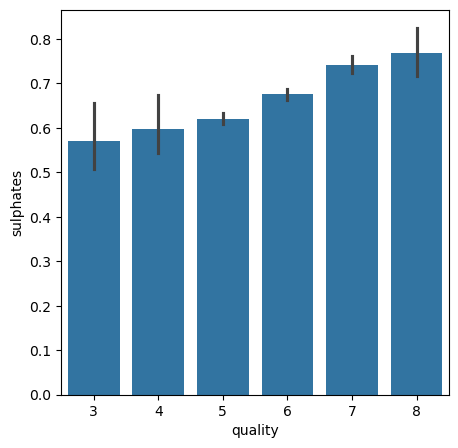

In [45]:
# Sulphates vs Quality : Proposnal
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='sulphates',data=wine_dataset)

<Axes: xlabel='quality', ylabel='alcohol'>

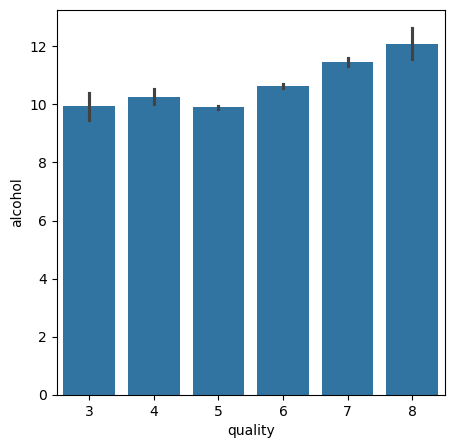

In [46]:
# Alcohol vs Quality : Proposnal
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='alcohol',data=wine_dataset)

In [48]:
# Correlation Between data

In [49]:
correlation = wine_dataset.corr()

<Axes: >

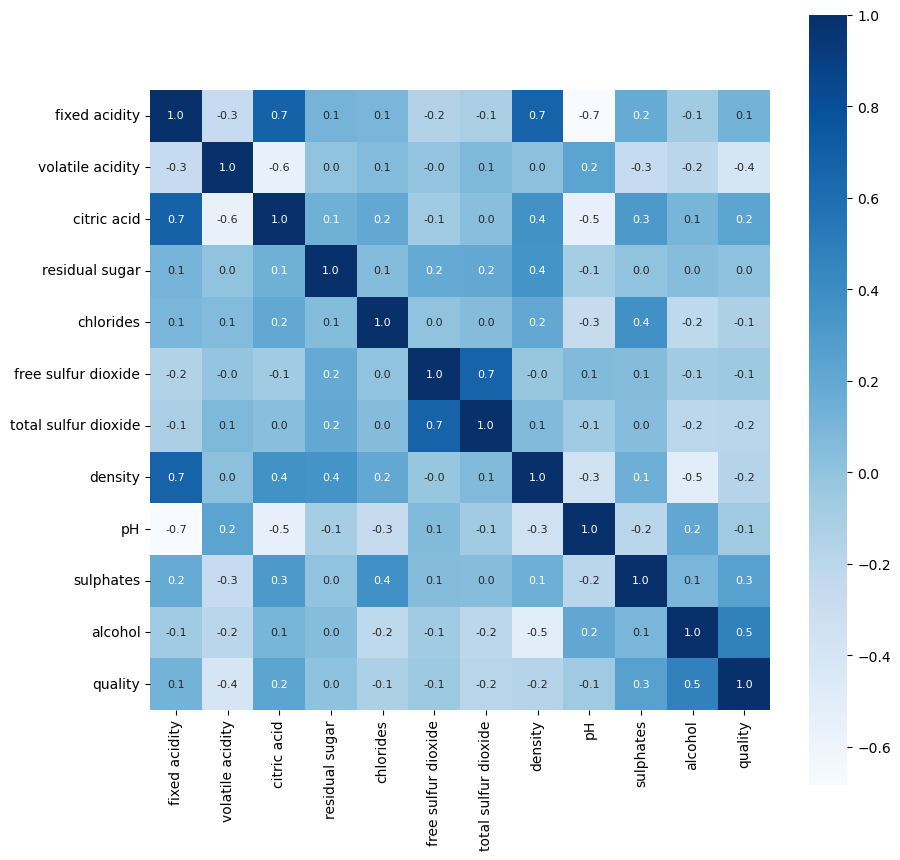

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [58]:
# Data Preprocessing and Data Seperation

In [59]:
X = wine_dataset.drop(columns='quality',axis=1)
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0) #Label Binarization || 1 == Good(>=7) , 0 == Bad(<7)

In [57]:
X,Y

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4             0.700         0.00             1.9      0.076   
 1               7.8             0.880         0.00             2.6      0.098   
 2               7.8             0.760         0.04             2.3      0.092   
 3              11.2             0.280         0.56             1.9      0.075   
 4               7.4             0.700         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 1594            6.2             0.600         0.08             2.0      0.090   
 1595            5.9             0.550         0.10             2.2      0.062   
 1596            6.3             0.510         0.13             2.3      0.076   
 1597            5.9             0.645         0.12             2.0      0.075   
 1598            6.0             0.310         0.47             3.6      0.067   
 
       free su

In [60]:
# Train Test Split

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2,stratify=Y)

In [62]:
X.shape, X_train.shape, X_test.shape

((1599, 11), (1279, 11), (320, 11))

In [66]:
# Model Training with RandomForestClassifier

In [64]:
model = RandomForestClassifier()

In [65]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [67]:
# Training Data Model Evalution

In [68]:
X_train_prediction = model.predict(X_train)

In [74]:
print("Training Data Classification Report : \n",classification_report(X_train_prediction,Y_train))
print("Training Data Confusion Mertics : \n",confusion_matrix(X_train_prediction,Y_train))

Training Data Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1105
           1       1.00      1.00      1.00       174

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279

Training Data Confusion Mertics : 
 [[1105    0]
 [   0  174]]


In [71]:
# Testing Data Model Evalution

In [72]:
X_test_prediction = model.predict(X_test)

In [76]:
print("Testing Data Classification Report : \n",classification_report(X_test_prediction,Y_test))
print("Testing Data Confusion Metrics : \n",confusion_matrix(X_test_prediction,Y_test))

Testing Data Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       286
           1       0.67      0.85      0.75        34

    accuracy                           0.94       320
   macro avg       0.83      0.90      0.86       320
weighted avg       0.95      0.94      0.94       320

Testing Data Confusion Metrics : 
 [[272  14]
 [  5  29]]


In [77]:
# Build a Predictive System for single instance

In [82]:
input_data = (8.9,0.62,0.19,3.9,0.17,51.0,148.0,0.9986,3.17,0.93,9.2)
# Sample-1 | (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0) == Good Quality Wine
# Sample-2 | (8.9,0.62,0.19,3.9,0.17,51.0,148.0,0.9986,3.17,0.93,9.2) == Bad Quality Wine

# Changing input data into numpy array
input_data_array = np.asarray(input_data)
# Reshape the array because we are predicting for single instance
input_data_array_reshape = input_data_array.reshape(1,-1)

prediction = model.predict(input_data_array_reshape)

# Printing Statements
print(prediction)

if(prediction == 1):
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

[0]
Bad Quality Wine


C:\Users\ARTH\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
